In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [103]:
from medvqa.utils.files import load_pickle
from medvqa.evaluation.plots import plot_metrics, visualize_image_and_polygons
from medvqa.datasets.chexlocalize import CHEXLOCALIZE_CLASS_NAMES, extract_images_segmentation_masks_and_binary_labels
import numpy as np
import medvqa
from importlib import reload

In [102]:
reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.plots' from '/home/pamessina/medvqa/medvqa/evaluation/plots.py'>

# 1) Phrase Grounding: DenseNet121 + CXRFE + Sigmoid-based attention

In [7]:
!python ../eval_phrase_grounding.py \
--checkpoint_folder_path "/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240618_175951_mscxr+chst-img-anat+vinbig+chexloc_PhraseGrounder(dn121,SigmoidAttention,128,256,256,1)" \
--max_images_per_batch 100 \
--max_phrases_per_batch 2000 \
--max_phrases_per_image 30 \
--eval_chexlocalize

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240618_175951_mscxr+chst-img-anat+vinbig+chexloc_PhraseGrounder(dn121,SigmoidAttention,128,256,256,1)
   max_images_per_batch: 100
   max_phrases_per_batch: 2000
   max_phrases_per_image: 30
   num_workers: 0
   device: GPU
   mscxr_phrase2embedding_filepath: None
   eval_chest_imagenome_gold: False
   eval_mscxr: False
   eval_chexlocalize: True
----- Evaluating model -----
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240618_175951_mscxr+chst-img-anat+vinbig+chexloc_PhraseGrounder(dn121,SigmoidAttention,128,256,256,1)/metadata.json
--------------------------------------------------
1) device = cuda
--------------------------------------------------
2) Creating instance of PhraseGrounder ...
MultiPurposeVisualModule()
  Initializing raw_image_encoder: densenet-121
create_densenet121_feature_extractor()
   drop_rate: 0

In [147]:
tmp1 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240618_175951_mscxr+chst-img-anat+vinbig+chexloc_PhraseGrounder(dn121,SigmoidAttention,128,256,256,1)/chexlocalize_metrics.pkl')

In [166]:
tmp = tmp1

In [150]:
tmp.keys()

dict_keys(['image_paths', 'phrases', 'pred_masks', 'gt_masks', 'ious', 'segmask_iou', 'classif_acc', 'prc_auc'])

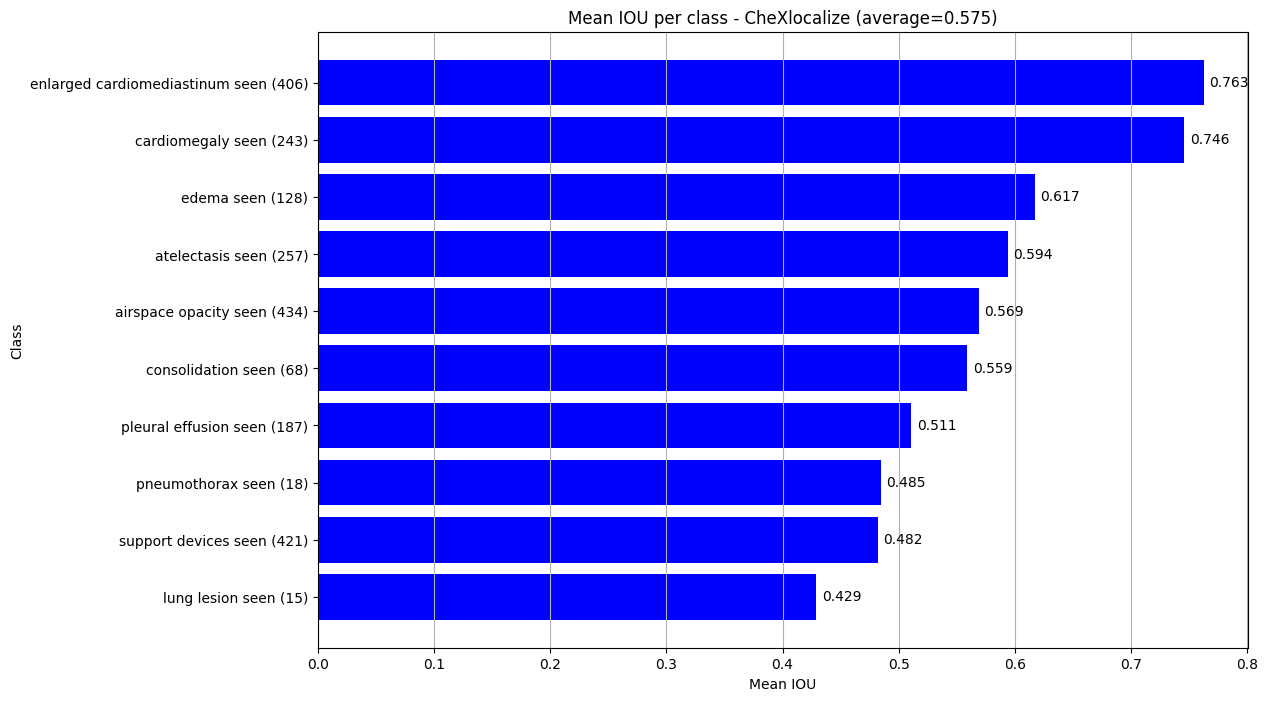

In [11]:
from medvqa.datasets.chexlocalize import CHEXLOCALIZE_CLASS_NAME2PHRASE

chexlocalize_phrases = list(CHEXLOCALIZE_CLASS_NAME2PHRASE.values())
phrase2idxs = { x:[] for x in chexlocalize_phrases }
for idx, phrase in enumerate(tmp['phrases']):
    phrase2idxs[phrase].append(idx)

phrase2mean_iou = {}
for phrase, idxs in phrase2idxs.items():
    phrase2mean_iou[phrase] = np.mean([tmp['ious'][idx] for idx in idxs])

plot_metrics(
    metric_names=[f'{name} ({len(phrase2idxs[name])})' for name in chexlocalize_phrases],
    metric_values=[phrase2mean_iou[phrase] for phrase in chexlocalize_phrases],
    title='Mean IOU per class - CheXlocalize',
    ylabel='Class',
    xlabel='Mean IOU',
    horizontal=True,
    sort_metrics=True,
    show_metrics_above_bars=True,
    draw_grid=True,
    figsize=(12, 8),
    append_average_to_title=True,
)

In [12]:
from medvqa.evaluation.plots import visualize_attention_maps

In [167]:
idxs = np.argsort(tmp['ious'])[::-1]

In [168]:
# idx = idxs[-200]
idx = idxs[0]
print(tmp['ious'][idx])
print()
print(tmp['image_paths'][idx])
print()
print(tmp['phrases'][idx])

0.9133356912897177

/mnt/workspace/CheXlocalize/CheXpert_512x512/test/patient65031/study1/view1_frontal.jpg

airspace opacity seen


In [18]:
image_paths, masks, labels, polygons, polygon_names = extract_images_segmentation_masks_and_binary_labels(13, 13, return_polygons=True)

Without masks: 216/902


/mnt/workspace/CheXlocalize/CheXpert_512x512/test/patient65031/study1/view1_frontal.jpg


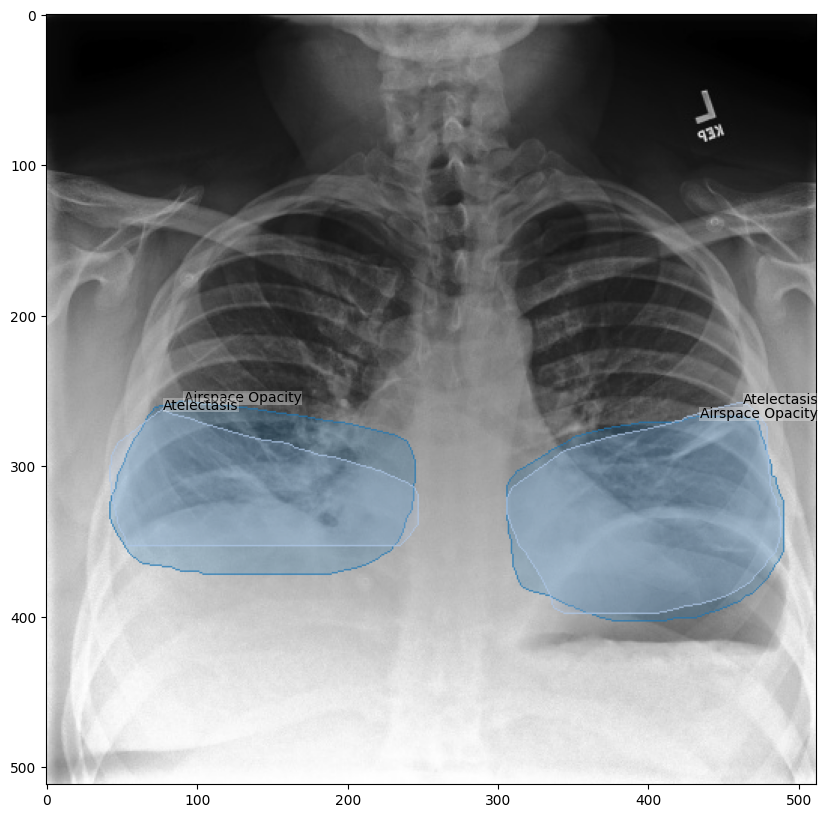

In [169]:
i = image_paths.index(tmp['image_paths'][idx])
print(image_paths[i])
visualize_image_and_polygons(
    image_path=image_paths[i],
    polygons_list=polygons[i],
    polygon_names=polygon_names[i],
    figsize=(10, 10),
    as_segmentation=True,
#     mask_resolution=(100, 100),
)

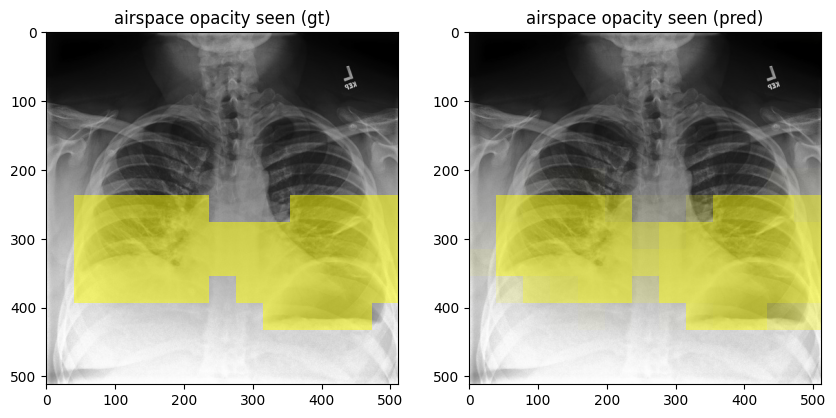

In [170]:
visualize_attention_maps(
    image_path=tmp['image_paths'][idx],
    figsize=(10,10),
    attention_factor=0.5,
    attention_maps=[
        tmp['gt_masks'][idx].reshape(13,13),
        tmp['pred_masks'][idx].reshape(13,13),
    ],
    titles=[
        f"{tmp['phrases'][idx]} (gt)",
        f"{tmp['phrases'][idx]} (pred)",
    ],
)

# 2) Phrase Grounding: DenseNet121 + CXRFE + Transformer Encoder

In [130]:
!python ../eval_phrase_grounding.py \
--checkpoint_folder_path "/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240618_093614_mscxr+chst-img-anat+vinbig+chexloc_PhraseGrounder(dn121,TransformerEncoder,128,256,4,512,3)" \
--max_images_per_batch 100 \
--max_phrases_per_batch 2000 \
--max_phrases_per_image 30 \
--eval_chexlocalize

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240618_093614_mscxr+chst-img-anat+vinbig+chexloc_PhraseGrounder(dn121,TransformerEncoder,128,256,4,512,3)
   max_images_per_batch: 100
   max_phrases_per_batch: 2000
   max_phrases_per_image: 30
   num_workers: 0
   device: GPU
   mscxr_phrase2embedding_filepath: None
   eval_chest_imagenome_gold: False
   eval_mscxr: False
   eval_chexlocalize: True
----- Evaluating model -----
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240618_093614_mscxr+chst-img-anat+vinbig+chexloc_PhraseGrounder(dn121,TransformerEncoder,128,256,4,512,3)/metadata.json
--------------------------------------------------
1) device = cuda
--------------------------------------------------
2) Creating instance of PhraseGrounder ...
MultiPurposeVisualModule()
  Initializing raw_image_encoder: densenet-121
create_densenet121_feature_extractor()
   drop

In [131]:
tmp2 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240618_093614_mscxr+chst-img-anat+vinbig+chexloc_PhraseGrounder(dn121,TransformerEncoder,128,256,4,512,3)/chexlocalize_metrics.pkl')

In [156]:
tmp = tmp2

In [157]:
tmp.keys()

dict_keys(['image_paths', 'phrases', 'pred_masks', 'gt_masks', 'ious', 'segmask_iou', 'classif_acc', 'prc_auc'])

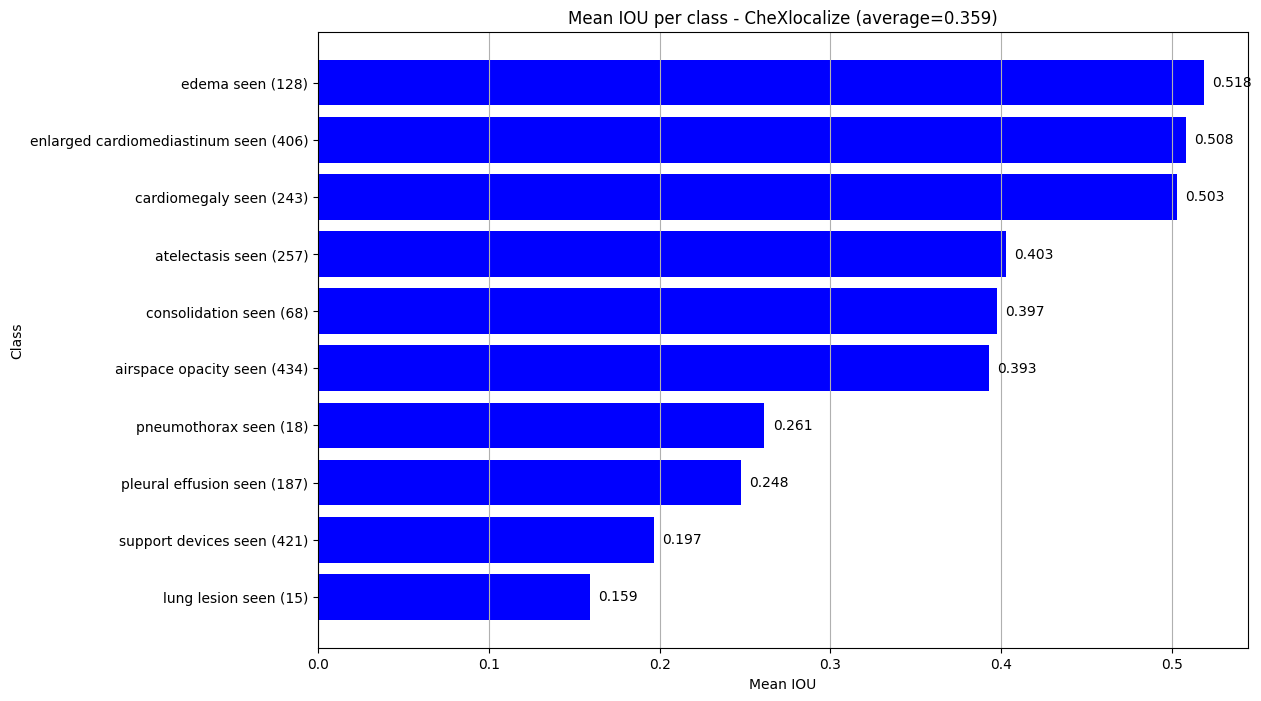

In [158]:
from medvqa.datasets.chexlocalize import CHEXLOCALIZE_CLASS_NAME2PHRASE

chexlocalize_phrases = list(CHEXLOCALIZE_CLASS_NAME2PHRASE.values())
phrase2idxs = { x:[] for x in chexlocalize_phrases }
for idx, phrase in enumerate(tmp['phrases']):
    phrase2idxs[phrase].append(idx)

phrase2mean_iou = {}
for phrase, idxs in phrase2idxs.items():
    phrase2mean_iou[phrase] = np.mean([tmp['ious'][idx] for idx in idxs])

plot_metrics(
    metric_names=[f'{name} ({len(phrase2idxs[name])})' for name in chexlocalize_phrases],
    metric_values=[phrase2mean_iou[phrase] for phrase in chexlocalize_phrases],
    title='Mean IOU per class - CheXlocalize',
    ylabel='Class',
    xlabel='Mean IOU',
    horizontal=True,
    sort_metrics=True,
    show_metrics_above_bars=True,
    draw_grid=True,
    figsize=(12, 8),
    append_average_to_title=True,
)

In [159]:
idxs = np.argsort(tmp['ious'])[::-1]

In [163]:
idx = idxs[0]
print(tmp['ious'][idx])
print()
print(tmp['image_paths'][idx])
print()
print(tmp['phrases'][idx])

0.8287440009622546

/mnt/workspace/CheXlocalize/CheXpert_512x512/val/patient64739/study1/view1_frontal.jpg

enlarged cardiomediastinum seen


/mnt/workspace/CheXlocalize/CheXpert_512x512/val/patient64739/study1/view1_frontal.jpg


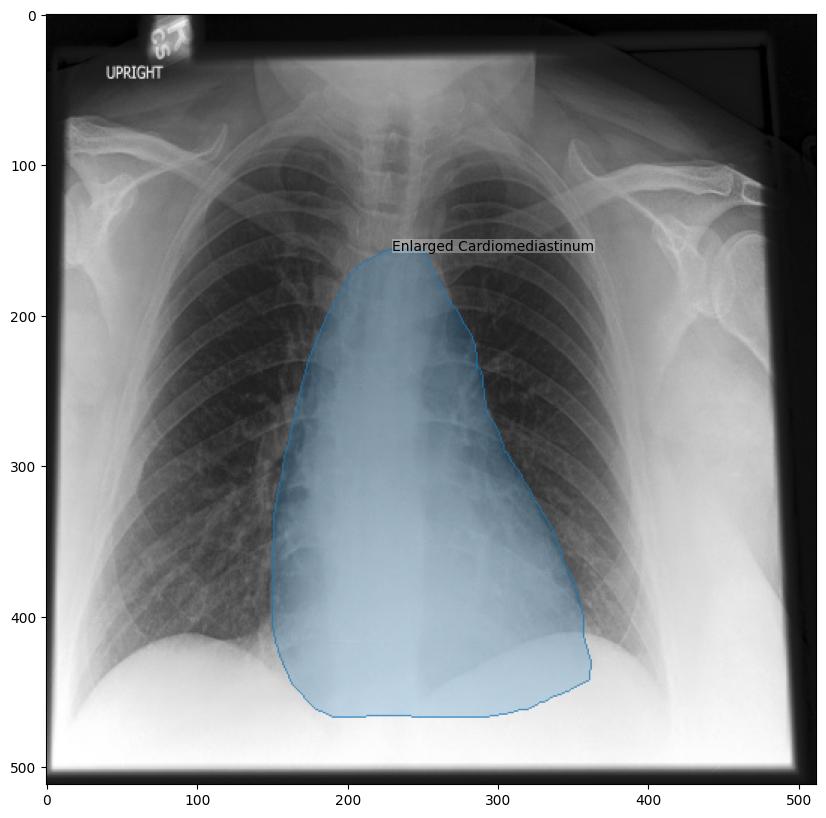

In [164]:
i = image_paths.index(tmp['image_paths'][idx])
print(image_paths[i])
visualize_image_and_polygons(
    image_path=image_paths[i],
    polygons_list=polygons[i],
    polygon_names=polygon_names[i],
    figsize=(10, 10),
    as_segmentation=True,
#     mask_resolution=(100, 100),
)

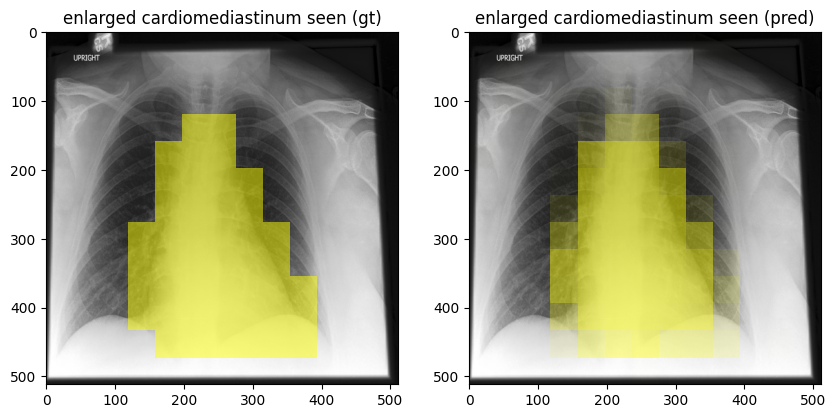

In [165]:
visualize_attention_maps(
    image_path=tmp['image_paths'][idx],
    figsize=(10,10),
    attention_factor=0.5,
    attention_maps=[
        tmp['gt_masks'][idx].reshape(13,13),
        tmp['pred_masks'][idx].reshape(13,13),
    ],
    titles=[
        f"{tmp['phrases'][idx]} (gt)",
        f"{tmp['phrases'][idx]} (pred)",
    ],
)